In [1]:
import pandas as pd
import glob

# Procesamiento de datos

In [2]:
resultados=pd.read_csv("data/gpt3_salida/resultados.csv")
resultados

,Unnamed: 0,0,1
0,0,data/gpt3\1\paraphraseGPT3.csv,"[0.8757267493312642, 0.5889830508474576]"
1,1,data/gpt3\2\paraphraseGPT2.csv,"[0.46060263605441076, 0.7966101694915254]"
2,2,data/gpt3\3\Originales.csv,"[0.8723098787210756, 0.5847457637221126]"


In [3]:
resultados=resultados.assign(grupo=0.0)
resultados=resultados.assign(error=0.0)
resultados=resultados.assign(accuracy=0.0)

In [4]:
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/gpt3\1\paraphraseGPT3.csv,"[0.8757267493312642, 0.5889830508474576]",0.0,0.0,0.0
1,1,data/gpt3\2\paraphraseGPT2.csv,"[0.46060263605441076, 0.7966101694915254]",0.0,0.0,0.0
2,2,data/gpt3\3\Originales.csv,"[0.8723098787210756, 0.5847457637221126]",0.0,0.0,0.0


In [5]:
temp=resultados.copy()
grupos=["GPT3","GPT2","Originales"]
i=0
for index,strings in temp.iterrows():
    resultados.at[index,'grupo']=grupos[i]
    resultados.at[index,'error']=float(strings[2].split(',')[0][1:])
    resultados.at[index,'accuracy']=float(strings[2].split(',')[1][:-1])
    i+=1
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/gpt3\1\paraphraseGPT3.csv,"[0.8757267493312642, 0.5889830508474576]",GPT3,0.875727,0.588983
1,1,data/gpt3\2\paraphraseGPT2.csv,"[0.46060263605441076, 0.7966101694915254]",GPT2,0.460603,0.796610
2,2,data/gpt3\3\Originales.csv,"[0.8723098787210756, 0.5847457637221126]",Originales,0.872310,0.584746


array([<AxesSubplot:title={'center':'error'}, xlabel='grupo'>,
       <AxesSubplot:title={'center':'accuracy'}, xlabel='grupo'>],
      dtype=object)

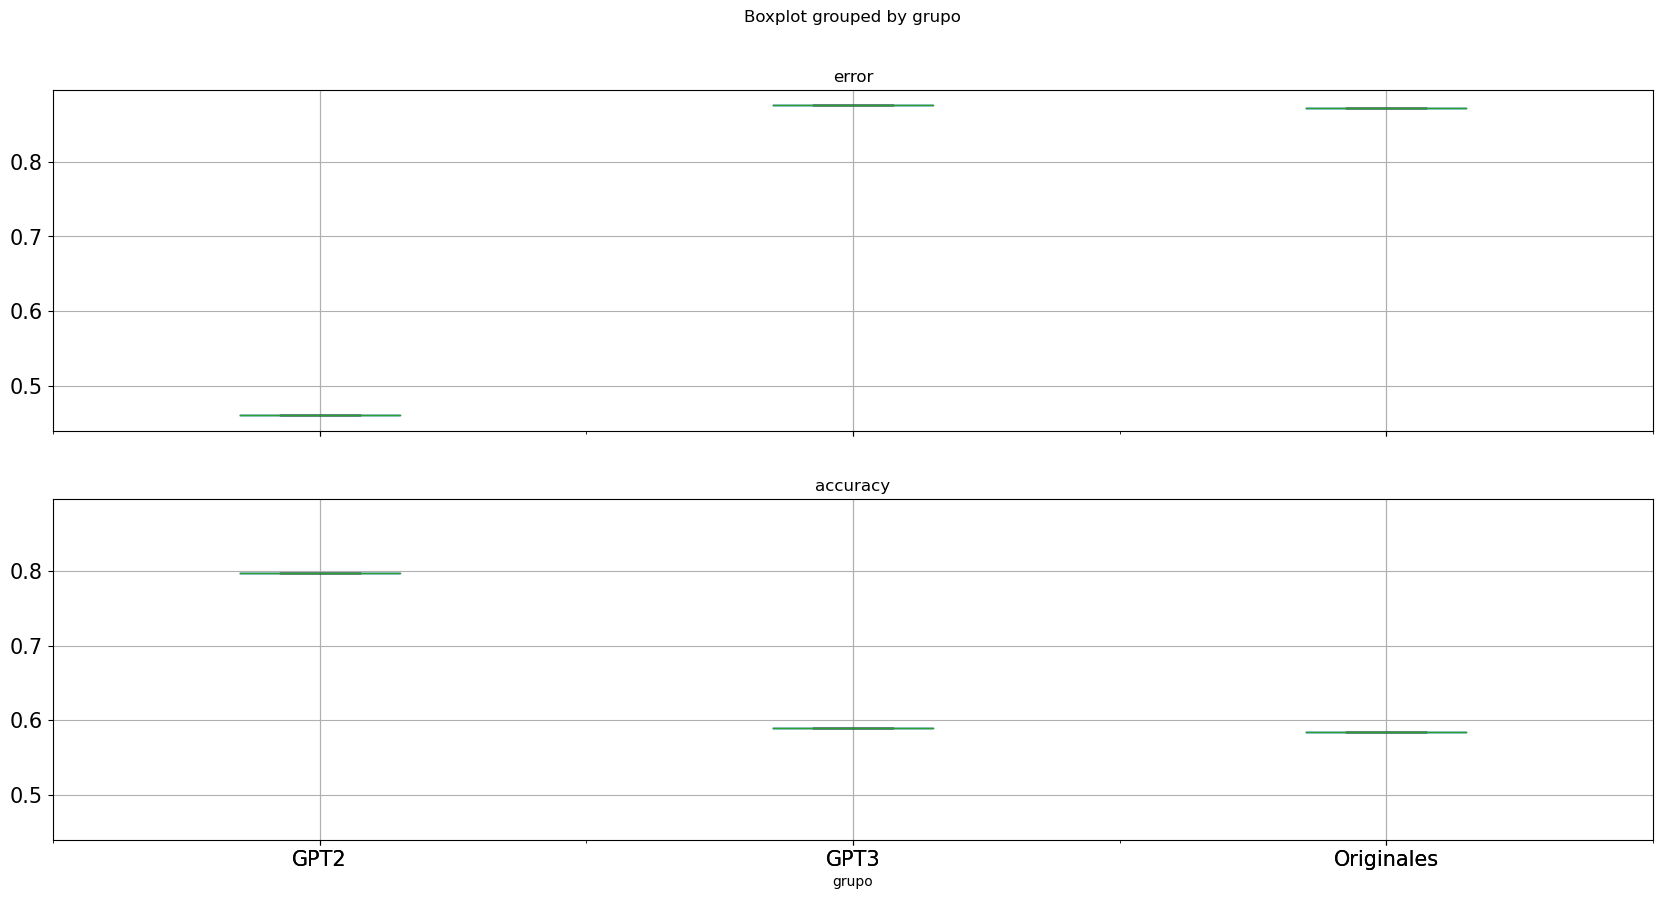

In [6]:
resultados.boxplot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10))
#resultados.boxplot(by='grupo')

<Figure size 1000x600 with 0 Axes>

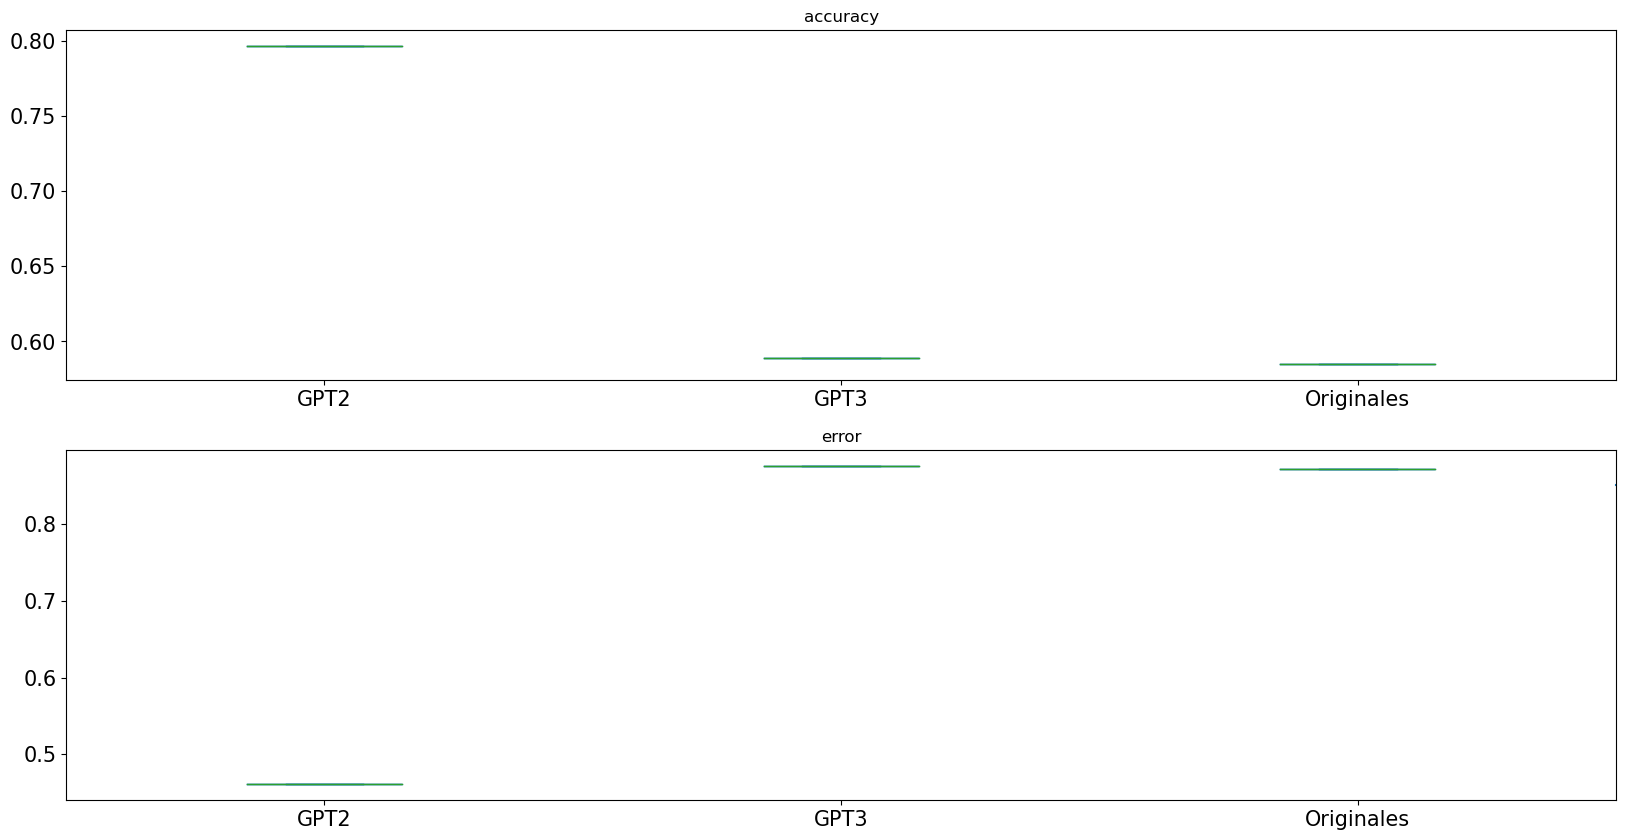

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
resultados.plot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10),subplots=True, 
    sharey=False,kind='box')
plt.axhline(y=0.85073, xmin=1, xmax=100)
plt.subplots_adjust(wspace=0.5)
plt.show()

# Del corpus base vamos a quitar los del test y solo comparar con los de paráfraseo

In [8]:
a=glob.glob('data/gpt3_salida/*.pickle')
a[0]

'data/gpt3_salida\\pOriginales.csv.pickle'

In [9]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [10]:
f=pd.read_pickle(a[0])
f

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,Input1,Input2,Permute1,Dot1
0,0,"[NULL{null,PROPN}, the{the,DET}, firemen{firem...","[NULL{null,PROPN}, the{the,DET}, firefighters{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.05917971, 0.571155, 0.36966527]","[0.0, 0.0, 1.0]",0,1232,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.122995034, 0.0, 0.0, 0.0, 0.0, 0...","[[0.085589595, 0.004343943, 0.09742787, 0.0111..."
1,1,"[NULL{null,ADJ}, man{man,NOUN}, with{with,ADP}...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.88403684, 0.09224719, 0.023715904]","[1.0, 0.0, 0.0]",0,1542,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.310719, 0.0, 0.19230267, 0.0, 0....","[[0.085589595, 0.004343943, 0.1707767, 0.02319..."
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.33229244, 0.43128988, 0.23641773]","[0.0, 0.0, 1.0]",0,6924,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.36247516, 0.0, 0.0, 0.29966068, ...","[[0.085589595, 0.014024382, 0.053287175, 0.170..."
3,3,"[NULL{null,ADJ}, people{people,NOUN}, buy{buy,...","[NULL{null,ADJ}, people{people,NOUN}, are{be,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.6095219, 0.35536963, 0.035108443]","[1.0, 0.0, 0.0]",0,8974,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.00935347, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[[0.085589595, 0.16620766, 0.011193112, 0.1511..."
4,4,"[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[NULL{null,PROPN}, a{a,DET}, race{race,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0159388, 0.47644493, 0.5076163]","[0.0, 0.0, 1.0]",0,2424,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.033746194, 0.0, 0.019639082, 0.0...","[[0.085589595, 0.014024382, 0.14666604, 0.2294..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.09922571, 0.6755098, 0.22526442]","[0.0, 0.0, 1.0]",0,1682,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54039025, 0....","[[0.085589595, 0.014024382, 0.17077179, 0.0984..."
232,232,"[NULL{null,ADV}, a{a,DET}, moving{move,VERB}, ...","[NULL{null,ADV}, a{a,DET}, moving{move,VERB}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.119476795, 0.5692583, 0.31126493]","[0.0, 0.0, 1.0]",0,6931,"[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0....","[[0.085589595, 0.014024382, 0.14766112, 0.1685..."
233,233,"[NULL{null,ADJ}, security{security,NOUN}, offi...","[NULL{null

In [15]:
f.loc[1].Permute1

array([[ 0.        ,  0.        ,  0.310719  , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.00114946,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02424495,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.00938728,  0.        ,  0.27135786, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [16]:
f.loc[1].Dot1

array([[0.0855896 , 0.00434394, 0.1707767 , ..., 0.        , 0.        ,
        0.        ],
       [0.1707767 , 0.        , 3.2146893 , ..., 0.        , 0.        ,
        0.        ],
       [0.00511678, 0.        , 0.03129339, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

# Procesar todos los archivos para obtener las etiquetas originales y las predicciones

In [17]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
    df_prediction.to_pickle(e)

In [28]:
gpt3=pd.read_pickle(a[0])
gpt2=pd.read_pickle(a[1])
originales=pd.read_pickle(a[2])

In [34]:
gpt2

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, during{during,ADP}, calf{calf...","[NULL{null,ADJ}, two{two,NUM}, ropes{rope,NOUN...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.35754782, 0.2142201, 0.42823207]","[0.0, 0.0, 1.0]",1,46,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, atting{att,VE...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.457366, 0.33981103, 0.202823]","[1.0, 0.0, 0.0]",1,51,entailment,entailment
2,2,"[NULL{null,ADJ}, two{two,NUM}, children{child,...","[NULL{null,ADJ}, two{two,NUM}, children{child,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.0011870137, 0.37438717, 0.6244258]","[0.0, 0.0, 1.0]",1,54,contradiction,contradiction
3,3,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.0067735617, 0.13920452, 0.8540219]","[0.0, 1.0, 0.0]",1,67,contradiction,neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.19951415, 0.6003217, 0.20016415]","[0.0, 1.0, 0.0]",1,85,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.18726309, 0.5323529, 0.280384]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral
232,232,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, the{the,DET}, line{line,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.020037875, 0.44166335, 0.5382988]","[0.0, 0.0, 1.0]",1,9685,contradiction,contradiction
233,233,"[NULL{null,PROPN}, an{an,DET}, impoverished{im...","[NULL{null,ADJ}, one{one,NUM}, person{person,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.43901053, 0.3556297, 0.2053598]","[1.0, 0.0, 0.0]",1,9718,entailment,entailment
234,234,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.17675486, 0.32663244, 0.49661264]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction


In [35]:
gpt3

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, the{the,DET}, firemen{firem...","[NULL{null,PROPN}, the{the,DET}, firefighters{...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.0026324792, 0.54914397, 0.44822353]","[0.0, 0.0, 1.0]",0,1232,neutral,contradiction
1,1,"[NULL{null,ADJ}, man{man,NOUN}, with{with,ADP}...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.34559757, 0.41528618, 0.23911631]","[1.0, 0.0, 0.0]",0,1542,neutral,entailment
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.10723625, 0.57111156, 0.32165217]","[0.0, 0.0, 1.0]",0,6924,neutral,contradiction
3,3,"[NULL{null,ADJ}, people{people,NOUN}, buy{buy,...","[NULL{null,ADJ}, people{people,NOUN}, are{be,V...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.24126692, 0.7107703, 0.047962748]","[1.0, 0.0, 0.0]",0,8974,neutral,entailment
4,4,"[NULL{null,PROPN}, a{a,DET}, biker{biker,NOUN}...","[NULL{null,PROPN}, a{a,DET}, race{race,NOUN}, ...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.0046892134, 0.4981529, 0.4971578]","[0.0, 0.0, 1.0]",0,2424,neutral,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.062268917, 0.6413811, 0.29634994]","[0.0, 0.0, 1.0]",0,1682,neutral,contradiction
232,232,"[NULL{null,ADV}, a{a,DET}, moving{move,VERB}, ...","[NULL{null,ADV}, a{a,DET}, moving{move,VERB}, ...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.09096562, 0.5971164, 0.31191793]","[0.0, 0.0, 1.0]",0,6931,neutral,contradiction
233,233,"[NULL{null,ADJ}, security{security,NOUN}, offi...","[NULL{null,PROPN}, a{a,DET}, security{security...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.07650379, 0.629439, 0.2940572]","[0.0, 0.0, 1.0]",0,4924,neutral,contradiction
234,234,"[NULL{null,ADJ}, three{three,NUM}, children{ch...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[0.26283336, 0.032292444, 0.7048742]","[1.0, 0.0, 0.0]",0,995,contradiction,entailment


# Vamos a obtener la representación a revisar

In [36]:
for index,strings in gpt2.iterrows():
    if strings["predicted_label"]!=strings["gold_label"]:
        print(index,strings["Idx"],strings["Hipotesis"],strings["predicted_label"],strings["gold_label"])

3 67 ['NULL{null,ADJ}', 'anowmobile{anowmobile,NOUN}', 'in{in,ADP}', 'a{a,DET}', 'snowstorm{snowstorm,NOUN}'] contradiction neutral
92 3408 ['NULL{null,ADJ}', 'aumper{aumper,NOUN}', 'bumper{bumper,NOUN}', 'to{to,ADP}', 'cars{car,NOUN}', 'in{in,ADP}', 'traffic{traffic,NOUN}', 'clogs{clog,VERB}', 'the{the,DET}', 'street{street,NOUN}', '.{.,PUNCT}'] neutral contradiction
128 5094 ['NULL{null,ADJ}', 'theundertaking{theundertaking,NOUN}', 'is{be,VERB}', 'old{old,ADJ}'] entailment neutral
144 5840 ['NULL{null,ADJ}', 'aanny{aanny,NOUN}', 'is{be,VERB}', 'pushing{push,VERB}', 'a{a,DET}', 'shopping{shopping,NOUN}', 'cart{cart,NOUN}', '.{.,PUNCT}'] neutral entailment
228 9562 ['NULL{null,ADJ}', 'ourists{ourist,NOUN}', 'are{be,VERB}', 'on{on,ADP}', 'a{a,DET}', 'bus{bus,NOUN}', 'tour{tour,NOUN}'] contradiction neutral
229 9607 ['NULL{null,ADJ}', 'two{two,NUM}', 'woman{woman,NOUN}', 'standing{stand,VERB}', 'staring{star,VERB}', 'at{at,ADP}', 'a{a,DET}', 'painted{paint,VERB}', 'mural{mural,NOUN}', '.

In [37]:
for index,strings in gpt3.iterrows():
    if strings["predicted_label"]!=strings["gold_label"]:
        print(index,strings["Idx"],strings["Hipotesis"],strings["predicted_label"],strings["gold_label"])

0 1232 ['NULL{null,PROPN}', 'the{the,DET}', 'firefighters{firefighter,NOUN}', 'are{be,VERB}', 'setting{set,VERB}', 'a{a,DET}', 'fire{fire,NOUN}', '.{.,PUNCT}'] neutral contradiction
1 1542 ['NULL{null,PROPN}', 'the{the,DET}', 'man{man,NOUN}', 'has{have,VERB}', 'his{-PRON-,ADJ}', 'face{face,NOUN}', 'painted{paint,VERB}', '.{.,PUNCT}'] neutral entailment
2 6924 ['NULL{null,PROPN}', 'a{a,DET}', 'young{young,ADJ}', 'woman{woman,NOUN}', 'and{and,CCONJ}', 'old{old,ADJ}', 'man{man,NOUN}', 'are{be,VERB}', 'playing{play,VERB}', 'poker{poker,NOUN}', '.{.,PUNCT}'] neutral contradiction
3 8974 ['NULL{null,ADJ}', 'people{people,NOUN}', 'are{be,VERB}', 'shopping{shop,VERB}', 'for{for,ADP}', 'many{many,ADJ}', 'things{thing,NOUN}', 'at{at,ADP}', 'the{the,DET}', 'market{market,NOUN}', '.{.,PUNCT}'] neutral entailment
4 2424 ['NULL{null,PROPN}', 'a{a,DET}', 'race{race,NOUN}', 'car{car,NOUN}', 'driver{driver,NOUN}', 'is{be,VERB}', 'doing{do,VERB}', 'laps{lap,NOUN}', 'in{in,ADP}', 'front{front,NOUN}', 'of

In [40]:
grupos=["Originales","GPT2","GPT3"]


# Ya se tiene para todos los muestreos las etiquetas originales vs las predichas

In [41]:
new_data = {'Docs' : [], 'Total' : [], 'Total Entailment' : [], 'Total Entailment (E)' : [],
             'Total Entailment (N)' : [], 'Total Entailment (C)' : [], 'Total Neutral' : [],
             'Total Neutral (N)' : [], 'Total Neutral (E)' : [], 'Total Neutral (C)' : [],
             'Total Contradiction' : [],'Total Contradiction (C)' : [],'Total Contradiction (E)' : [],
             'Total Contradiction (N)' : [], 'grupo': [], 'parafraseo': []}
i=0
for e in a:
    df_prediction=pd.read_pickle(e)    
    c_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='neutral')].shape[0]
    cc_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_entailment=df_prediction[df_prediction['gold_label']=='entailment'].shape[0]
    c_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='neutral')].shape[0]
    ce_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cc_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_neutral=df_prediction[df_prediction['gold_label']=='neutral'].shape[0]
    c_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    ce_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='neutral')].shape[0]
    t_contradiction=df_prediction[df_prediction['gold_label']=='contradiction'].shape[0]
    new_data['Docs'].append(e)
    new_data['Total'].append(df_prediction.shape[0])
    new_data['Total Entailment'].append(t_entailment)
    new_data['Total Entailment (E)'].append(c_entailment)
    new_data['Total Entailment (N)'].append(cn_entailment)
    new_data['Total Entailment (C)'].append(cc_entailment)
    new_data['Total Neutral'].append(t_neutral)
    new_data['Total Neutral (E)'].append(ce_neutral)
    new_data['Total Neutral (N)'].append(c_neutral)
    new_data['Total Neutral (C)'].append(cc_neutral)
    new_data['Total Contradiction'].append(t_contradiction)
    new_data['Total Contradiction (E)'].append(ce_contradiction)
    new_data['Total Contradiction (N)'].append(cn_contradiction)
    new_data['Total Contradiction (C)'].append(c_contradiction)
    new_data['grupo'].append(grupos[i])
    new_data['parafraseo'].append(1)
    i+=1
new_data=pd.DataFrame(new_data)
new_data.to_csv("data/gpt3_salida/predictions/Fresultados.csv")

In [42]:
new_data = pd.read_csv("data/gpt3_salida/predictions/Fresultados.csv")
new_data

,Unnamed: 0,Docs,Total,Total Entailment,Total Entailment (E),Total Entailment (N),Total Entailment (C),Total Neutral,Total Neutral (N),Total Neutral (E),Total Neutral (C),Total Contradiction,Total Contradiction (C),Total Contradiction (E),Total Contradiction (N),grupo,parafraseo
0,0,data/gpt3_salida/pOriginales.csv.pickle,236,110,0,89,21,54,0,32,22,72,0,11,61,Originales,1
1,1,data/gpt3_salida/pparaphraseGPT2.csv.pickle,236,110,109,1,0,54,51,1,2,72,70,0,2,GPT2,1
2,2,data/gpt3_salida/pparaphraseGPT3.csv.pickle,236,110,31,60,19,54,20,18,16,72,16,5,51,GPT3,1


array([[<AxesSubplot:title={'center':'Total'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Entailment'}, xlabel='[grupo, parafraseo]'>],
       [<AxesSubplot:title={'center':'Total Neutral'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Contradiction'}, xlabel='[grupo, parafraseo]'>]],
      dtype=object)

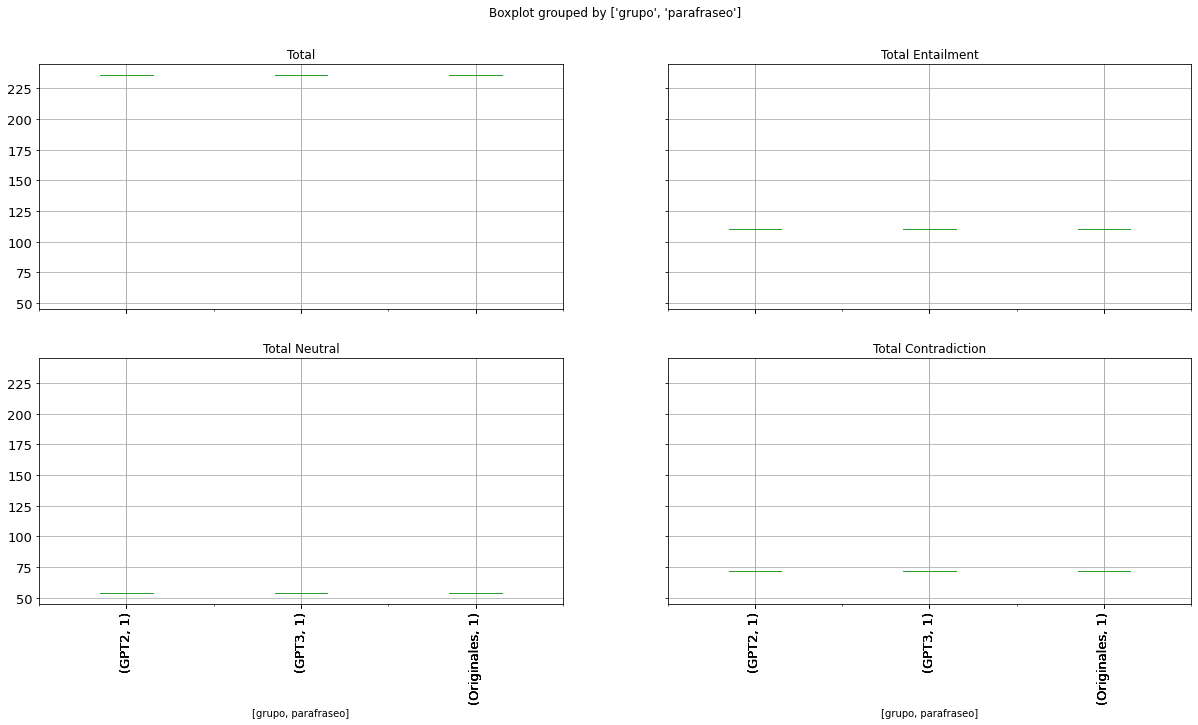

In [43]:
new_data.boxplot(column=['Total', 'Total Entailment','Total Neutral','Total Contradiction'],by=['grupo', 'parafraseo'],fontsize=13,figsize=(20,10),rot=90)
#new_data.boxplot()

array([[<AxesSubplot:title={'center':'Total Entailment'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (E)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Entailment (N)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (C)'}, xlabel='grupo'>]],
      dtype=object)

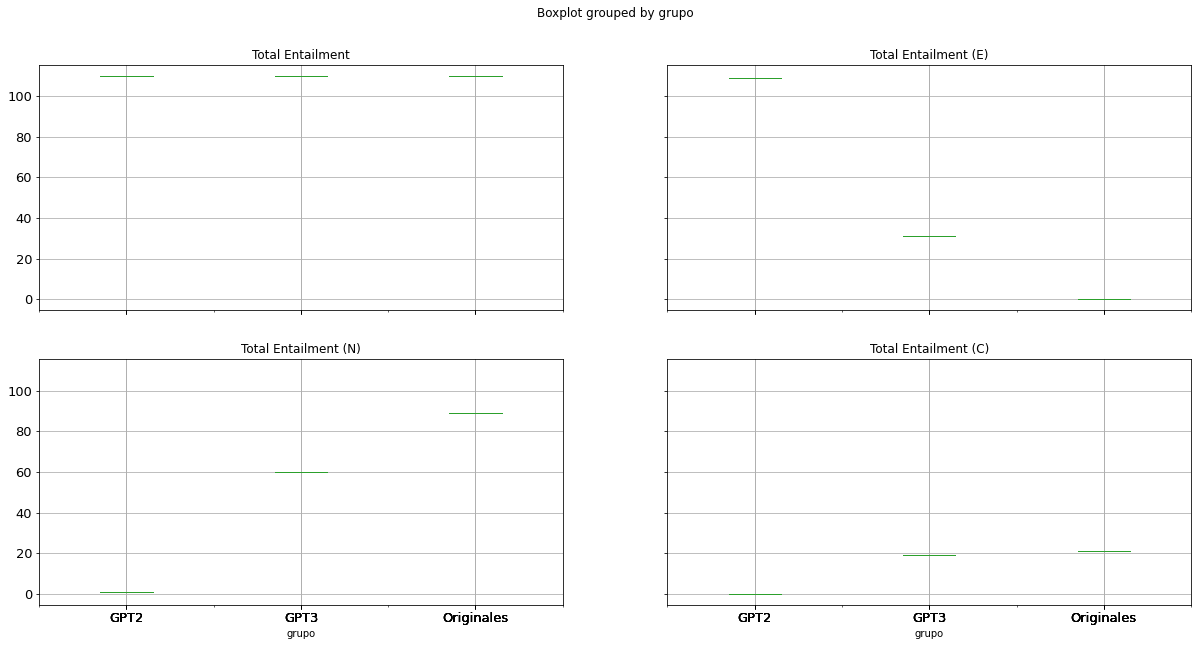

In [44]:
new_data.boxplot(column=['Total Entailment','Total Entailment (E)','Total Entailment (N)','Total Entailment (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Neutral'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (N)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Neutral (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (C)'}, xlabel='grupo'>]],
      dtype=object)

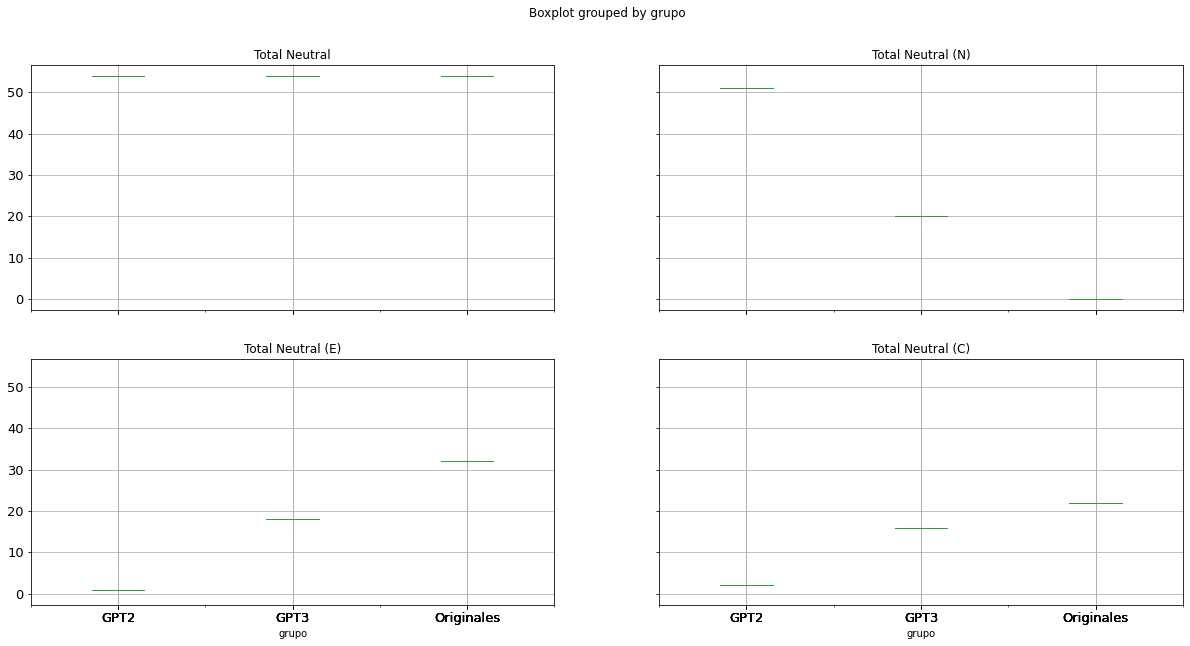

In [45]:
new_data.boxplot(column=['Total Neutral','Total Neutral (N)','Total Neutral (E)','Total Neutral (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (C)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Contradiction (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (N)'}, xlabel='grupo'>]],
      dtype=object)

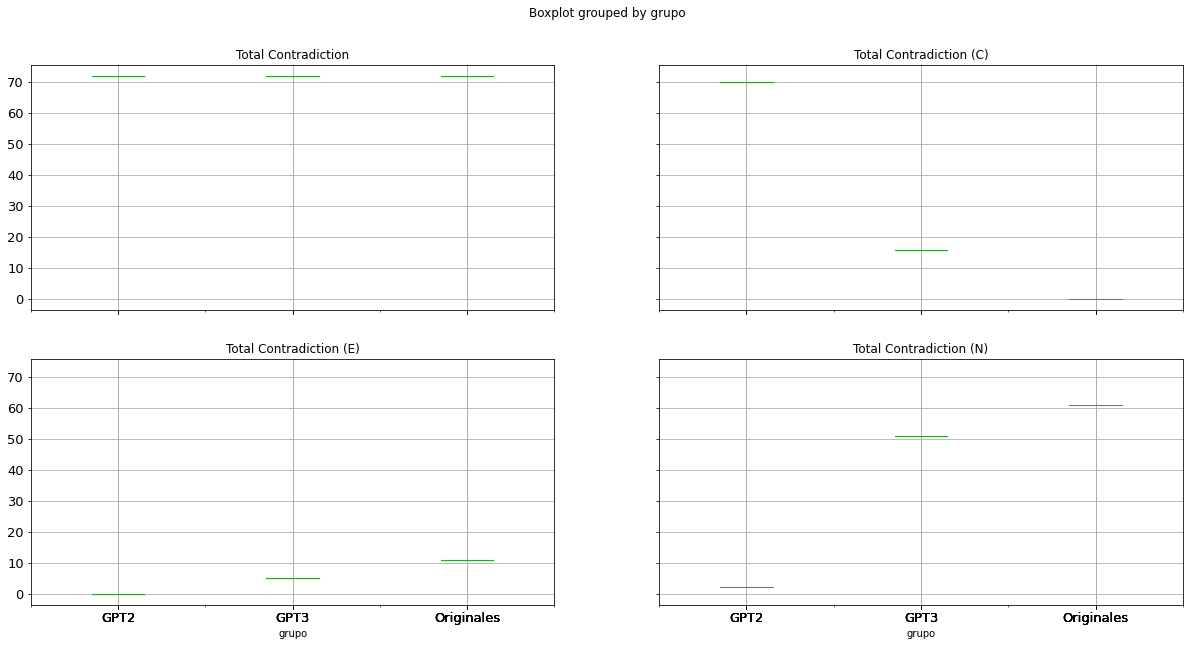

In [47]:
new_data.boxplot(column=['Total Contradiction','Total Contradiction (C)','Total Contradiction (E)','Total Contradiction (N)',],by='grupo',fontsize=13,figsize=(20,10))